In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Python/LogisticR.xlsx')

In [3]:
df

,customer,spending,card,coupon
0,1,2.291000,1,0
1,2,3.215000,1,0
2,3,2.135000,1,0
3,4,3.924000,0,0
4,5,2.528000,1,0
...,...,...,...,...
95,96,0.662473,1,0
96,97,0.637582,0,1
97,98,0.612692,0,0
98,99,0.587802,1,0


In [4]:
df.describe()

,customer,spending,card,coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.794973,0.330000,0.200000
std,29.011492,0.884083,0.472582,0.402015
min,1.000000,0.562912,0.000000,0.000000
25%,25.750000,1.176569,0.000000,0.000000
50%,50.500000,1.745192,0.000000,0.000000
75%,75.250000,2.294555,1.000000,0.000000
max,100.000000,7.076000,1.000000,1.000000


In [5]:
df['coupon'].unique()


array([0, 1], dtype=int64)

In [6]:
df['coupon'].value_counts()


0    80
1    20
Name: coupon, dtype: int64

Build the model

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
x=df[['card','spending']]
y=df['coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
len(x_train),len(x_test),len(y_train),len(y_test)

(75, 25, 75, 25)

fit the model

In [10]:
lreg=LogisticRegression(solver='lbfgs')
lreg.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_predict=lreg.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [12]:
y_predict_train=lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
y_prob_train=lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(-1,1)

array([[0.21540511],
       [0.2177946 ],
       [0.22321623],
       [0.21277278],
       [0.22088097],
       [0.21330396],
       [0.15499781],
       [0.22214372],
       [0.15360125],
       [0.15842188],
       [0.21609698],
       [0.15640472],
       [0.22020316],
       [0.21731518],
       [0.15272453],
       [0.15514541],
       [0.15404115],
       [0.19897267],
       [0.15857214],
       [0.21654969],
       [0.21578615],
       [0.15752277],
       [0.21635862],
       [0.21991313],
       [0.21521478],
       [0.21626313],
       [0.21058624],
       [0.21559557],
       [0.21760274],
       [0.15700968],
       [0.22146314],
       [0.21643837],
       [0.15625613],
       [0.217411  ],
       [0.2225333 ],
       [0.15566295],
       [0.22350937],
       [0.15551494],
       [0.21808262],
       [0.21875574],
       [0.22039667],
       [0.21837092],
       [0.22049347],
       [0.21981651],
       [0.22331391],
       [0.22156027],
       [0.15455567],
       [0.219

In [14]:
y_prob=lreg.predict_proba(x_test)[:,1]
y_prob

array([0.15767233, 0.21904467, 0.22068716, 0.21827479, 0.15477661,
       0.15440852, 0.21607225, 0.22165744, 0.15416142, 0.15371635,
       0.15287037, 0.15374777, 0.15692567, 0.21712362, 0.22263077,
       0.15301992, 0.15714936, 0.22136603, 0.21980384, 0.21693219,
       0.21923745, 0.15804675, 0.21645414, 0.21798659, 0.2205903 ])

In [15]:
x=df[['card','spending']]
y=df['coupon']

In [16]:
import statsmodels.api as sm
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary())

C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.492819
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                 0.01515
Time:                        17:58:50   Log-Likelihood:                -49.282
converged:                       True   LL-Null:                       -50.040
Covariance Type:            nonrobust   LLR p-value:                    0.4685
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7629      0.632     -1.208      0.227      -2.001       0.475
card          -0.4996      0.

Accuracy

In [17]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
score

0.8

Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[20,  0],
       [ 5,  0]], dtype=int64)

In [19]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
print("true negative:",tn)
print("false postive:",fp)
print("false negative:",fn)
print("true positive:",tp)

true negative: 20
false postive: 0
false negative: 5
true positive: 0


classification report

In [20]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       0.00      0.00      0.00         5

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.80


In [22]:
Specificity=tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 1.00


In [23]:
Sensitivity=tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.00


ROC curve

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1=roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)

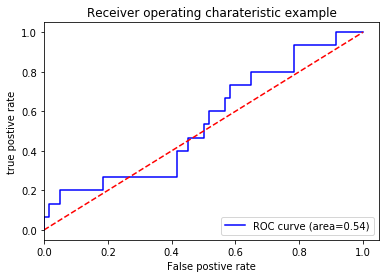

In [25]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='ROC curve (area=%0.2f)' %roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False postive rate')
plt.ylabel('true postive rate')
plt.title('Receiver operating charateristic example')
plt.legend(loc="lower right")
plt.show()

In [26]:
log_ROC_AUC=roc_auc_score(y_test,y_predict)
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

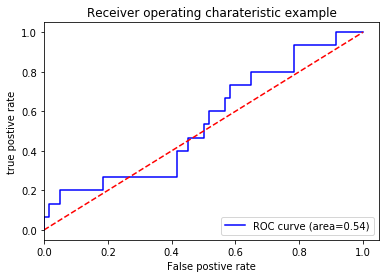

In [27]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='ROC curve (area=%0.2f)' %roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False postive rate')
plt.ylabel('true postive rate')
plt.title('Receiver operating charateristic example')
plt.legend(loc="lower right")
plt.show()

Setting the Threshold

In [28]:
from sklearn.preprocessing import binarize
y_predict_class1=binarize(y_prob.reshape(-1,1),0.35)[0]
y_predict_class1

array([0.])

In [29]:
y_predict_class1=y_predict_class1.astype(int)
y_predict_class1

array([0])

In [30]:
confusion_matrix2=confusion_matrix(y_test,y_predict_class1)
print(confusion_matrix2)

ValueError: Found input variables with inconsistent numbers of samples: [25, 1]

Optimal threshold value

In [31]:
from sklearn.metrics import roc_curve,auc


In [32]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

In [33]:
print("area under the roc curve :%f" % roc_auc)

area under the roc curve :0.690000


In [34]:
import numpy as np
i=np.arange(len(tpr))
roc=pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),'1-fpr':pd.Series(1-fpr,index=i),'tf':pd.Series(tpr-(1-fpr),index=i),
          'thresholds':pd.Series(thresholds,index=i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
5,0.55,0.6,0.45,0.15,0.216072


[]

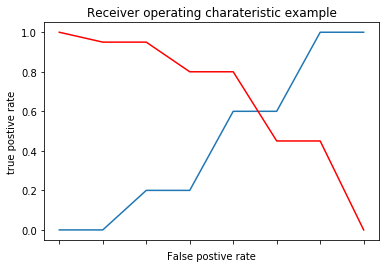

In [35]:
fig,ax=plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('False postive rate')
plt.ylabel('true postive rate')
plt.title('Receiver operating charateristic example')
ax.set_xticklabels([])